![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide1.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide2.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide3.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide4.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide5.JPG)

In [1]:
# Linear regression 
# Target = intercept + beta1*X1 + beta2*X2 ....+ et.........(z)

# Logistic regression
# P(Y/1-Y) = 1 / 1 + e^(-z)
# Target variable is (0/1)
# z = linear combination of the variables just like linear regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
# Logistic regression uses a function called as Sigmoid function
def sigmoid(t):
    return (1/(1+np.e**(-t)))

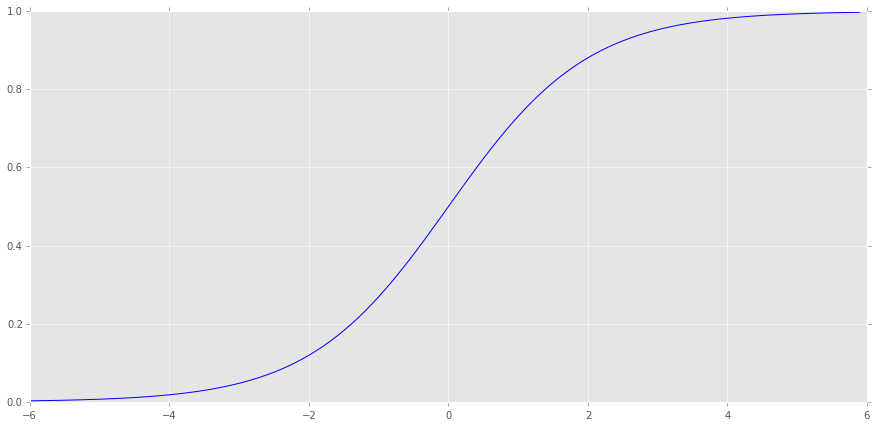

In [3]:
plt.figure(figsize=(15,7))
plot_range = np.arange(-6,6,0.1)
y_values = sigmoid(plot_range)

# plotting the sigmoid curve
plt.plot(plot_range,y_values,color='blue')

In [4]:
titanic_train = pd.read_csv('/root/hackerday/01_titanic/train.csv')

In [5]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C


In [7]:
char_cabin = titanic_train['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])

In [8]:
titanic_train['Cabin'] = pd.Categorical(new_cabin)

In [11]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C


In [12]:
titanic_train.Age.median()

28.0

In [13]:
new_age_var = np.where(titanic_train['Age'].isnull(),titanic_train.Age.median(),titanic_train['Age'])

In [14]:
titanic_train['Age'] = new_age_var

In [16]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C


In [17]:
from sklearn import linear_model
from sklearn import preprocessing

In [18]:
# initialize the label encoder
label_encoder = preprocessing.LabelEncoder()

In [19]:
# convert the sex variable into a numeric
encoded_sex = label_encoder.fit_transform(titanic_train['Sex'])
encoded_cabin = label_encoder.fit_transform(titanic_train['Cabin'])
encoded_pclass = label_encoder.fit_transform(titanic_train['Pclass'])

In [27]:
#print encoded_pclass

In [23]:
# initialize the logistic regression model
log_model = linear_model.LogisticRegression()

In [31]:
train_features=pd.DataFrame([encoded_sex,
                            encoded_pclass,
                            encoded_cabin,
                             titanic_train['Age']]).T

In [32]:
train_features.head(10)

,0,1,2,3
0,1,2,8,22
1,0,0,2,38
2,0,2,8,26
3,0,0,2,35
4,1,2,8,35
5,1,2,8,28
6,1,0,4,54
7,1,2,8,2
8,0,2,8,27
9,0,1,8,14


In [33]:
# Train the model
log_model.fit(X=train_features,y= titanic_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [34]:
# check the model result
print (log_model.coef_)
print (log_model.intercept_)

[[-2.43179802 -0.90790164 -0.06426483 -0.0265924 ]]
[ 3.32716302]


In [29]:
# logistic equation

# Prob(Y/(1-Y)) = 1 / (1 + exp(-(3.32-2.43*feature1-0.90*feature2-0.06*feature3-0.02*feature4))

In [36]:
# make predictions
pred = log_model.predict_proba(X = pd.DataFrame(train_features))
preds = pd.DataFrame(pred)
preds.columns = ['No_Survived','Survived']

In [43]:
print preds.head()

   No_Survived  Survived
0     0.882839  0.117161
1     0.100822  0.899178
2     0.424131  0.575869
3     0.093817  0.906183
4     0.914142  0.085858


In [45]:
# make predictions
preds = log_model.predict(X = train_features)
pd.crosstab(preds,titanic_train['Survived'])

Survived,0,1
row_0,,
0,463,98
1,86,244


In [45]:
print preds

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 

In [39]:
(463+244)/(463.+98+86+244) # model accuracy 79.3%

0.7934904601571269

In [46]:
log_model.score(X=train_features,y=titanic_train['Survived'])

0.79349046015712688

In [47]:
from sklearn import metrics

In [48]:
#confusion metrics
metrics.confusion_matrix(y_true = titanic_train['Survived'],
                        y_pred = preds)

array([[463,  86],
       [ 98, 244]])

In [49]:
#confusion metrics
print metrics.classification_report(y_true = titanic_train['Survived'],
                        y_pred = preds)

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       549
          1       0.74      0.71      0.73       342

avg / total       0.79      0.79      0.79       891



![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide6.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide7.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide8.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide9.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide10.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide11.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide12.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide13.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide14.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide15.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide16.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide17.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide18.JPG)

In [50]:
from sklearn.datasets import load_digits
digitData = load_digits()

In [51]:
df = pd.DataFrame(digitData['target'])
print df

      0
0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9     9
10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
20    0
21    1
22    2
23    3
24    4
25    5
26    6
27    7
28    8
29    9
...  ..
1767  4
1768  0
1769  5
1770  3
1771  6
1772  9
1773  6
1774  1
1775  7
1776  5
1777  4
1778  4
1779  7
1780  2
1781  8
1782  2
1783  2
1784  5
1785  7
1786  9
1787  5
1788  4
1789  8
1790  8
1791  4
1792  9
1793  0
1794  8
1795  9
1796  8

[1797 rows x 1 columns]


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [53]:
scaler = StandardScaler()

In [54]:
X = digitData['data']
Y = digitData['target']

In [55]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size =0.25, random_state=1234)

In [56]:
XTrain.shape, XTest.shape, YTrain.shape, YTest.shape

((1347, 64), (450, 64), (1347,), (450,))

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
modelDigit = LogisticRegression(solver='newton-cg', multi_class='multinomial')
modelDigit.fit(XTrain, YTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0)

In [59]:
modelDigit.score(XTrain,YTrain)

1.0

In [60]:
modelDigit.score(XTest,YTest)

0.96444444444444444

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide19.JPG)

In [75]:
preds = modelDigit.predict(XTest)
print metrics.confusion_matrix(YTest,preds)

[[36  0  1  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  1 48  0  0  0  0  0  0  0]
 [ 0  0  1 42  0  0  0  0  1  0]
 [ 0  1  0  0 49  0  0  1  1  0]
 [ 0  0  0  1  0 46  2  0  0  0]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  2  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  1 43]]


In [78]:
1-(16/450.)

0.9644444444444444

In [76]:
print metrics.classification_report(YTest,preds)

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.92      1.00      0.96        47
          2       0.92      0.98      0.95        49
          3       0.98      0.95      0.97        44
          4       1.00      0.94      0.97        52
          5       1.00      0.94      0.97        49
          6       0.96      0.96      0.96        45
          7       0.98      1.00      0.99        40
          8       0.91      0.93      0.92        43
          9       1.00      0.98      0.99        44

avg / total       0.97      0.96      0.96       450



![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide20.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide21.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide22.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide23.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide24.JPG)

![image](https://s3.amazonaws.com/dspython.dezyre.com/notebook_files/DS/python/module8/Slide25.JPG)